In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import os
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import json
import matplotlib
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

In [2]:
rat = 'r1'
mod = '2'

G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


# Figure 1A: Some cells with slightly different orientations and spacings

In [3]:
fig_directory = r'C:\Users\acostamendoza\Box\grid-cell-project\figure_2'

# Figure 1A: Some cells with slightly different orientations and spacings

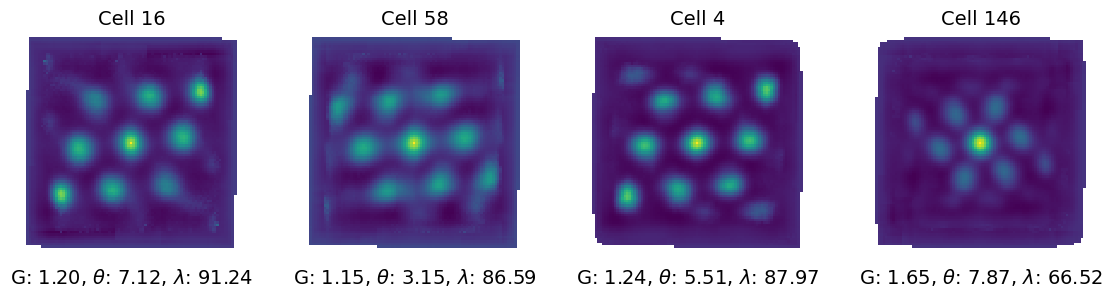

In [14]:
# cell 48 has orientation of 4.29, G = 1.22
# cell 65 has orientation of 7.47, G = 1.23

fig, axes = plt.subplots(1, 4, figsize=(14, 6))
# cells = [83, 58, 8, 128]
cells = [16, 58, 4, 146]

for i, cell in enumerate(cells):
    # sac = G.Scorer.calculate_sac(cell) * G.Scorer.get_ring_mask(G.mask_radius, 1)
    sac = G.Scorer.calculate_sac(cell)
    grid_score = G.grid_scores[cell]
    orientation = G.orientation[cell]
    spacing = G.spacing[cell]

    x_three, y_three = G.get_coordinates_first_3_peaks(sac, polar=False)
    xx, yy = np.meshgrid(np.linspace(-1, 1, 99), np.linspace(-1, 1, 99))
    
    masked_sac = np.ma.masked_where(sac == 0, sac)
    cmap = matplotlib.colormaps['viridis']
    cmap.set_bad(color='white')
    ax = axes[i]
    ax.pcolor(xx, yy, masked_sac, cmap = cmap)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    ax.axis('off')

    ax.text(0.0, -1.2, r'G: {:.2f}, $\theta$: {:.2f}, $\lambda$: {:.2f}'
                 .format(grid_score, orientation, spacing), horizontalalignment="center",
                 fontsize=14)
    ax.text(0.0, 1, 'Cell ' + str(cell), horizontalalignment="center", fontsize=14)

# save figure as svg
plt.savefig(fig_directory + '/A_example_sacs_no_hole.png', dpi=1200)

# Figure 1B: Overlay to show the difference

In [13]:
import cv2

sacs = []
n_bins = 100

for cell in cells:
    # sacs.append(G.Scorer.calculate_sac(cell, bins=n_bins) * G.Scorer.get_ring_mask(G.mask_radius, 1, bins=n_bins))
    sacs.append(G.Scorer.calculate_sac(cell, bins=n_bins))

image_1 = np.dstack((sacs[0],np.zeros_like(sacs[0]),np.zeros_like(sacs[0])))[25:-25, 25:-25, :]
# normalize to 0-1
image_1 = (image_1 - image_1.min()) / (image_1.max() - image_1.min())
image_1[image_1<0.05] = 0

image_2 = np.dstack((np.zeros_like(sacs[1]),sacs[1],np.zeros_like(sacs[1])))[25:-25, 25:-25, :]
image_2 = (image_2 - image_2.min()) / (image_2.max() - image_2.min())
image_2[image_2<0.05] = 0

image_3 = np.dstack((sacs[2], np.zeros_like(sacs[2]),np.zeros_like(sacs[2])))[25:-25, 25:-25, :]
image_3 = (image_3 - image_3.min()) / (image_3.max() - image_3.min())
image_3[image_3<0.05] = 0

image = image_1 + image_2 + image_3

image_4 = np.dstack((np.zeros_like(sacs[3]),sacs[3],np.zeros_like(sacs[3])))[25:-25, 25:-25, :]
image_4 = (image_4 - image_4.min()) / (image_4.max() - image_4.min())
image_4[image_4<0.05] = 0

image = image_1 + image_2 + image_3

# fig, axes = plt.subplots(2, 3, figsize=(14, 8))
#
# axes[0,0].imshow(image_1)
# axes[0,1].imshow(image_2)
# axes[0,2].imshow(image)
# axes[1,0].imshow(image_3)
# axes[1,1].imshow(image_4)
# axes[1,2].imshow(image_3 + image_4)

image_to_plot = [image_1, image_2, image, image_3, image_4, image_3 + image_4]
i = 1
for im in image_to_plot:
    # _, ax = plt.subplots(1, 1, figsize=(5, 8))

    # convert rgb to 8-bit
    # Convert the image to 8-bit format
    # scale im to be between 0 and 1
    im = (im - im.min()) / (im.max() - im.min())

    image_8bit = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    gray_image = cv2.cvtColor(image_8bit, cv2.COLOR_BGR2GRAY)
    fig_name = '/B_example_sacs_2_no_hole_' + str(i) + '.png'
    cv2.imwrite(fig_directory + fig_name, gray_image)

    # ax.axis('off')
    # ax.imshow(im)
    # # save them with different names
    #
    # # plt.savefig(fig_directory + fig_name, dpi=1200)
    # plt.close()
    i += 1

# for ax in axes.flatten():
#     ax.axis('off')
#
# plt.savefig(fig_directory + '/B_example_sacs_2_no_hole.png', dpi=1200)

In [7]:
print(im.shape)

(149, 149, 3)


In [21]:
print(np.shape(image))

(149, 149, 3)


# Figure 1C: Distribution of orientation and spacing

103
103


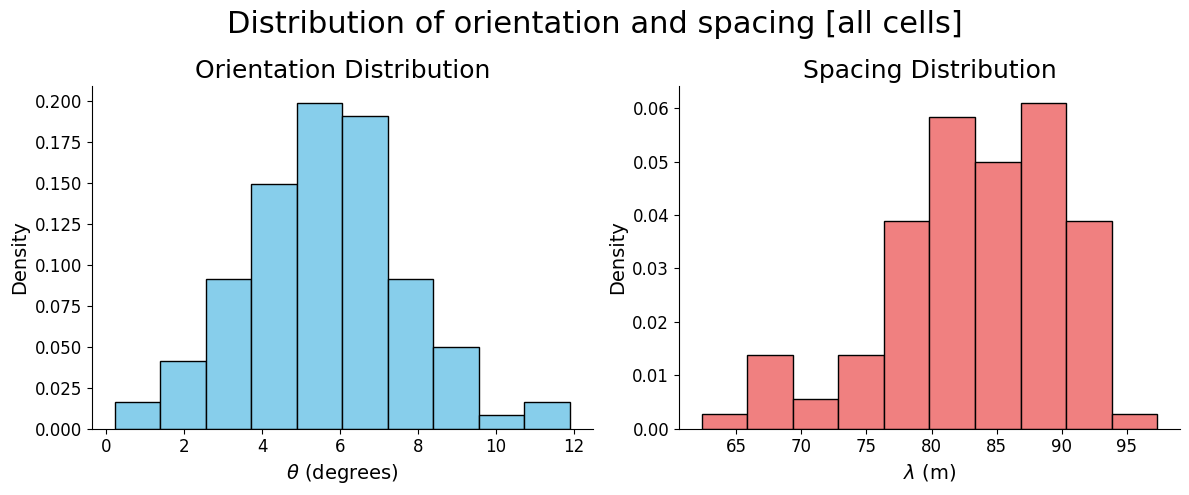

In [17]:
# Filter out 'None' entries from the data
filtered_orientation = [x for x in G.orientation if x is not None]
filtered_spacing = [x for x in G.spacing if x is not None]
print(len(filtered_spacing))
print(len(filtered_orientation))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# increase space with title
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of orientation and spacing [all cells]', fontsize=22)

# Plot histogram for the original data
axes[0].hist(filtered_orientation, bins=10, color='skyblue', edgecolor='black', density = True)
axes[0].set_xlabel(r'$\theta$ (degrees)')
axes[0].set_ylabel('Density')
axes[0].set_title('Orientation Distribution', fontsize = 18)

# Plot histogram for the filtered data (excluding None entries)
axes[1].hist(filtered_spacing, bins=10, color='lightcoral', edgecolor='black', density = True)
axes[1].set_xlabel(r'$\lambda$ (m)')
axes[1].set_ylabel('Density')
axes[1].set_title('Spacing Distribution', fontsize=18)

# set all labels to fontsize 14
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()
# plt.savefig(fig_directory + '/D_orientation_spacing_distribution.svg', dpi=1200)

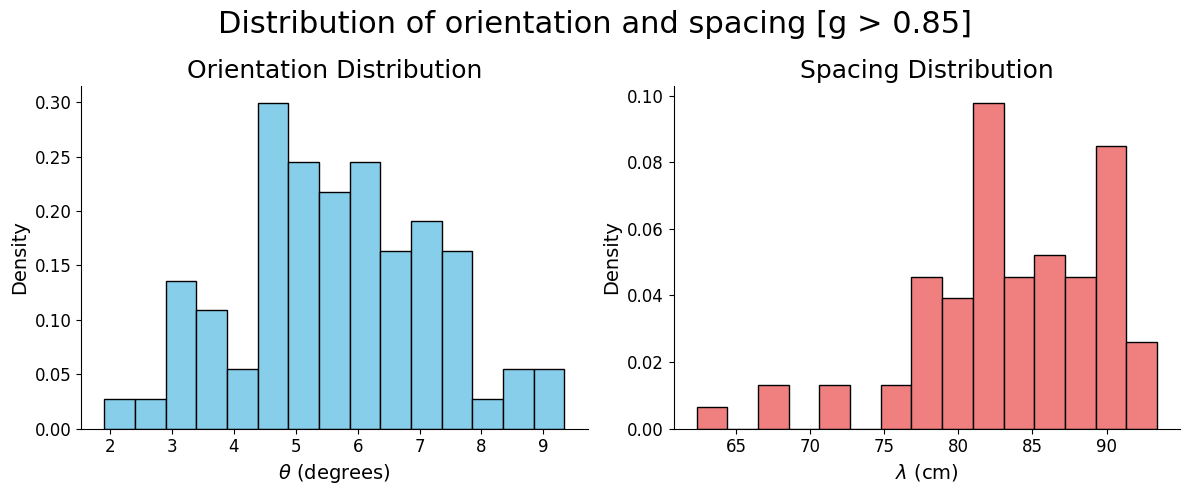

In [4]:
# Filter out 'None' entries from the data
good_cells = np.array(G.grid_scores) > 0.85
filtered_orientation = [x for x in np.array(G.orientation)[good_cells] if x is not None]
filtered_spacing = [x for x in np.array(G.spacing)[good_cells] if x is not None]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# increase space with title
fig.subplots_adjust(top=0.85)
fig.suptitle('Distribution of orientation and spacing [g > 0.85]', fontsize=22)

# Plot histogram for the original data
axes[0].hist(filtered_orientation, bins=15, color='skyblue', edgecolor='black', density = True)
axes[0].set_xlabel(r'$\theta$ (degrees)')
axes[0].set_ylabel('Density')
axes[0].set_title('Orientation Distribution', fontsize = 18)

# Plot histogram for the filtered data (excluding None entries)
axes[1].hist(filtered_spacing, bins=15, color='lightcoral', edgecolor='black', density = True)
axes[1].set_xlabel(r'$\lambda$ (cm)')
axes[1].set_ylabel('Density')
axes[1].set_title('Spacing Distribution', fontsize=18)

# set all labels to fontsize 14
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()
# plt.savefig(fig_directory + '/D_orientation_spacing_distribution.svg', dpi=1200)

# Taking the stats of the distributions

In [16]:
# count the cells with orientation and spacing
print('Number of cells with orientation: ', len(filtered_orientation))

orientation_25th = np.percentile(filtered_orientation, 25)
print('25th percentile of orientation: ', orientation_25th)
orientation_75th = np.percentile(filtered_orientation, 75)
print('75th percentile of orientation: ', orientation_75th)

spacing_25th = np.percentile(filtered_spacing , 25)
print('25th percentile of spacing: ', 100 * spacing_25th)
spacing_75th = np.percentile(filtered_spacing, 75)
print('75th percentile of spacing: ', 100 * spacing_75th)

Number of cells with orientation:  74
25th percentile of orientation:  4.662677547271285
75th percentile of orientation:  6.665462747009945
25th percentile of spacing:  80.68692838051273
75th percentile of spacing:  88.96414513655843


In [5]:
# mean and std of orientation and spacing 
print('Mean orientation: ', np.mean(filtered_orientation))
print('Std orientation: ', np.std(filtered_orientation))

print('Mean spacing: ', np.mean(filtered_spacing))
print('Std spacing: ', np.std(filtered_spacing))

Mean orientation:  5.65925247653894
Std orientation:  1.5631221612580293
Mean spacing:  83.64026439401249
Std spacing:  6.247023969605841


# Old parts (extra)

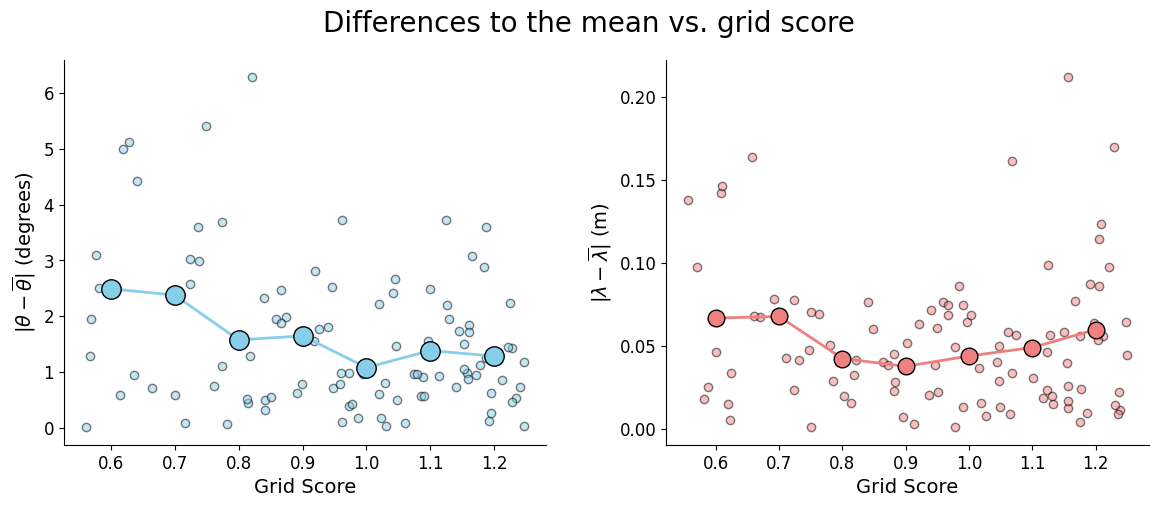

In [27]:
# plot the std deviation in orienation and spacing vs the grid score of every bin
bins = np.linspace(0.6, 1.2, 7)
digitized = np.digitize(filtered_score, bins)

mean_orientation = np.mean(filtered_orientation)
mean_spacing = np.mean(filtered_spacing)
# count how many cells in each bin
bin_counts = np.zeros_like(bins)
bin_delta_orientation = np.zeros_like(bins)
bin_delta_spacing = np.zeros_like(bins)

bin_orientations = []
bin_spacings = []
bin_delta_orientations = []
bin_delta_spacings = []
for i in range(1, len(bins)+1):
    bin_orientations.append(np.array(filtered_orientation)[digitized == i])
    bin_spacings.append(np.array(filtered_spacing)[digitized == i])

    bin_counts[i-1] = len(bin_orientations[-1])
    bin_delta_orientations.append(np.abs(bin_orientations[-1] - mean_orientation))
    bin_delta_spacings.append(np.abs(bin_spacings[-1] - mean_spacing))
    bin_delta_spacing[i-1] = np.abs(bin_spacings[-1] - mean_spacing).mean()
    bin_delta_orientation[i-1] = np.abs(bin_orientations[-1] - mean_orientation).mean()

# Create a figure with two subplots, one for orientation and one for spacing with x axis being grid score in a scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# make some space between subplots
fig.subplots_adjust(wspace=0.25)
# set fig title
fig.suptitle('Differences to the mean vs. grid score', fontsize=20)

axes[0].plot(bins, bin_delta_orientation, color='skyblue', marker='o', markeredgecolor = 'black', linewidth=2, markersize=14)

for i in range(len(bins)):
    for x in bin_delta_orientations[i]:
        jitter = random.uniform(-0.05, 0.05)
        axes[0].scatter(bins[i] + jitter, x, color='skyblue', edgecolor='black', alpha=0.5)
axes[0].set_xlabel('Grid Score')
axes[0].set_ylabel(r'|$\theta - \overline{\theta} $| (degrees)')

axes[1].plot(bins, bin_delta_spacing, markeredgecolor = 'black',color='lightcoral', marker='o', linewidth=2, markersize=12)
for i in range(len(bins)):
    for x in bin_delta_spacings[i]:
        jitter = random.uniform(-0.05, 0.05)
        axes[1].scatter(bins[i] + jitter, x, color='lightcoral', edgecolor='black', alpha=0.5)
axes[1].set_xlabel('Grid Score')
axes[1].set_ylabel(r'|$\lambda - \overline{\lambda} $| (m)')


for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # remove top and right splines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.savefig(session_results_directory + '/' + rat + mod +  '_variance_vs_grid_score.png', dpi=300)

In [28]:
# # Create a figure with two subplots, one for orientation and one for spacing with x axis being grid score in a scatter plot
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 
# axes[0].scatter(filtered_score, filtered_orientation, color='skyblue', edgecolor='black')
# axes[0].set_xlabel('Grid Score')
# axes[0].set_ylabel(r'$\theta$ (degrees)')
# 
# m, b = np.polyfit(filtered_score, filtered_orientation, 1)
# axes[0].plot(filtered_score, m*filtered_score + b, color='black')
# 
# axes[1].scatter(filtered_score, filtered_spacing, color='lightcoral', edgecolor='black')
# axes[1].set_xlabel('Grid Score')
# axes[1].set_ylabel(r'$\lambda$ (m)')
# 
# m, b = np.polyfit(filtered_score, filtered_spacing, 1)
# axes[1].plot(filtered_score, m*filtered_score + b, color='black')
# 
# # set all labels to fontsize 14
# for ax in axes:
#     ax.tick_params(axis='both', which='major', labelsize=12)
#     ax.xaxis.label.set_size(14)
#     ax.yaxis.label.set_size(14)
# 
# plt.savefig(session_results_directory + '/' + rat + mod +  '_1C_orientation_spacing_vs_grid_score.png', dpi=300)